In [42]:
##############Weltkarte

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
pn.extension()
import param
import numpy as np


In [58]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():
    df = pd.read_csv('merged_data_combined_iso3.csv')
    pn.state.cache['data'] = df.copy()
else: 
    df = pn.state.cache['data']
    
df_grouped = df.groupby('Country')['Happiness'].mean().reset_index()    

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


world = world.rename(columns= {"name" : "Country"})
world=pd.merge(world,df,left_on=['Country'],right_on=['Country'],how='left')

world = world.dropna()

C:\Users\laura\AppData\Local\Temp\ipykernel_15448\3116141822.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


C:\Users\laura\AppData\Local\Temp\ipykernel_15448\384822087.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


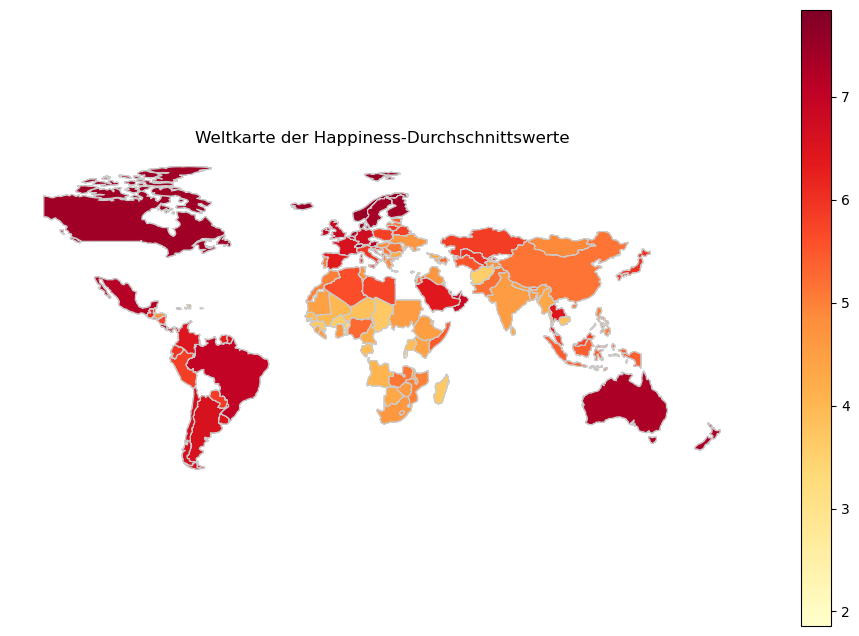

In [59]:
#merged = world_shapes.set_index('name').join(world_grouped.set_index('Country'))

# Definieren Sie Ihre Farbskala (colormap)
cmap = 'YlOrRd'  # Sie können eine andere Colormap wählen

# Erstellen Sie eine Figure und eine Axis für die Karte
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
world.plot(column='Happiness', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Legende hinzufügen
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=world['Happiness'].min(), vmax=world['Happiness'].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Weltkarte der Happiness-Durchschnittswerte")
ax.set_axis_off()

# Anzeigen der Weltkarte
plt.show()

In [60]:
world.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,Year,Region,Happiness_Rank,Happiness,...,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,ISO3
11,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2023.0,North America,13.0,6.9610,...,0.656000,0.218000,0.541000,1.484000,1.815000,CA,NAM,83.0213,39244168.0,CAN
12,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2022.0,North America,15.0,7.0250,...,0.659000,0.217000,0.783000,1.188000,1.924000,CA,NAM,82.8471,38929902.0,CAN
13,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2021.0,North America,14.0,7.1030,...,0.648000,0.246000,0.798000,1.044000,2.585000,CA,NAM,82.6565,38226498.0,CAN
14,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2020.0,North America,11.0,7.2321,...,0.644028,0.281529,1.022502,1.435392,2.195269,CA,NAM,82.0471,38007166.0,CAN
15,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2019.0,North America,9.0,7.2780,...,0.584000,0.285000,1.039000,1.505000,2.192000,CA,NAM,82.3628,37601230.0,CAN


In [66]:
world_shapes = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_shapes = world_shapes.set_geometry('geometry')

C:\Users\laura\AppData\Local\Temp\ipykernel_15448\3064675675.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapes = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [67]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    
    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()
    
    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr
        filtered_data = self.world_data[self.world_data["Year"] == self.year]
        merged = world_shapes.set_index('name').join(filtered_data.set_index('Country'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'YlOrRd'
        merged.plot(column="Happiness", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged["Happiness"].min(), vmax=merged["Happiness"].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der Happiness-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()
        
        return pn.pane.Matplotlib(fig, width=800, height=500)

In [68]:
# Erstellen Sie die WorldMapApp-Instanz
world_map_app = WorldMapApp(world=world)



In [73]:
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = event.new
    world_map_app.year = year

year_slider.param.watch(update_world_map, 'value')


Watcher(inst=IntSlider(end=2023, name='Year', start=2015, value=2015), cls=<class 'panel.widgets.slider.IntSlider'>, fn=<function update_world_map at 0x000002E5FCF9E2A0>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] ParamMethod(method, _pane=Matplotlib)
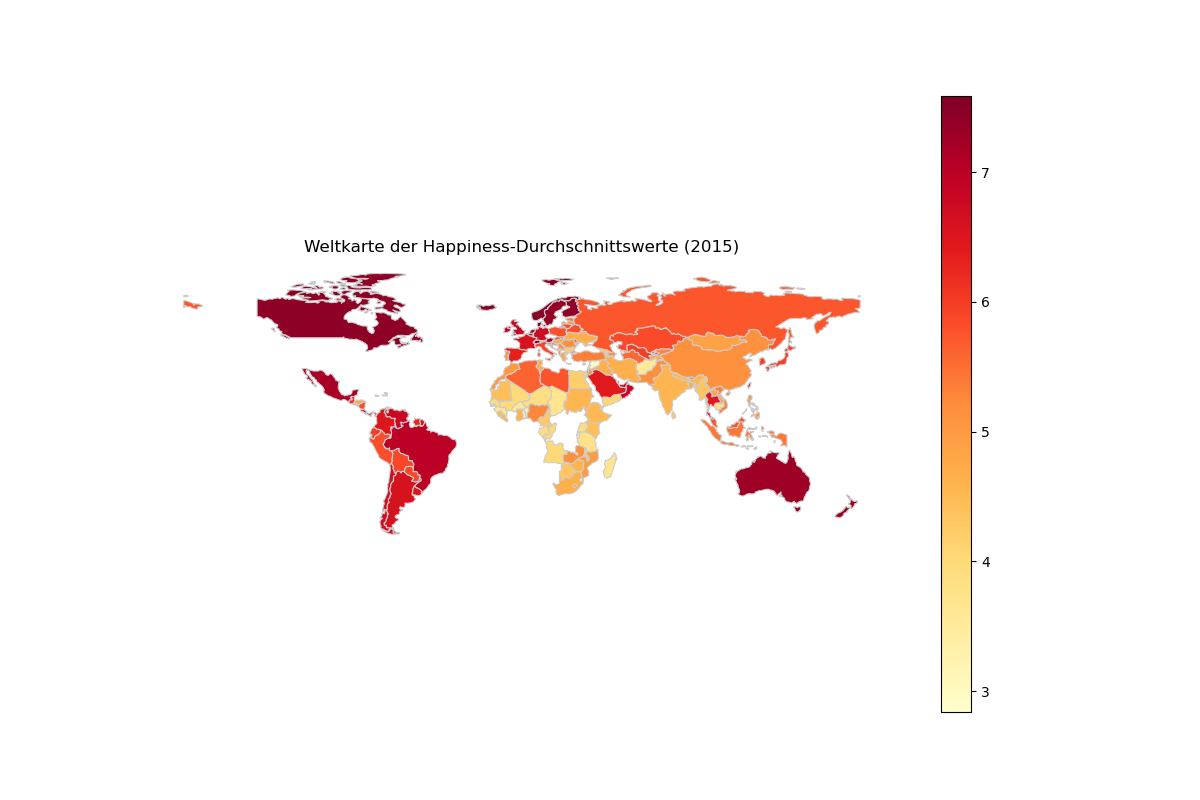

In [74]:
# Verknüpfen Sie den Slider mit der year-Parameter der WorldMapApp
year_slider.param.value = world_map_app.param.year

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()

In [51]:
# Die bereitgestellten GeoJSON-Daten für Bahrain
bahrain_geojson = {
    "type": "Feature",
    "properties": {"Country": "Bahrain", "woeid": "23424753"},
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [50.441498315672, 26.079486759594],
                [50.444990826448, 26.155368387131],
                [50.494398435257, 26.240297244012],
                [50.565645056344, 26.252673936522],
                [50.58600454793, 26.247660903832],
                [50.628002395199, 25.943018578555],
                [50.610418895937, 25.857704991003],
                [50.5840692813, 25.815491188858],
                [50.508839915777, 25.868375997347],
                [50.459210656002, 25.954651764437],
                [50.441498315672, 26.079486759594]
            ]
        ]
    }
}

# Erstellen Sie ein GeoDataFrame für Bahrain
bahrain_gdf = gpd.GeoDataFrame([{
    "name": "Bahrain",
    "geometry": shape(bahrain_geojson['geometry'])
}])

# Fügen Sie Bahrain zu Ihrem vorhandenen GeoDataFrame hinzu
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Lade Welt-Daten
world = world.append(bahrain_gdf, ignore_index=True)


In [52]:
# GeoJSON-Daten für "Bosnia and Herzegovina"
bih_geojson = {
    "type": "Feature",
    "properties": {
        "Country": "Bosnia and Herzegovina",
        "code": "BIH",
        "group": "Countries"
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [ [ [ 19.005486, 44.860234 ], [ 19.36803, 44.863 ], [ 19.11761, 44.42307 ], [ 19.59976, 44.03847 ], [ 19.454, 43.5681 ], [ 19.21852, 43.52384 ], [ 19.03165, 43.43253 ], [ 18.70648, 43.20011 ], [ 18.56, 42.65 ], [ 17.674922, 43.028563 ], [ 17.297373, 43.446341 ], [ 16.916156, 43.667722 ], [ 16.456443, 44.04124 ], [ 16.23966, 44.351143 ], [ 15.750026, 44.818712 ], [ 15.959367, 45.233777 ], [ 16.318157, 45.004127 ], [ 16.534939, 45.211608 ], [ 17.002146, 45.233777 ], [ 17.861783, 45.06774 ], [ 18.553214, 45.08159 ], [ 19.005486, 44.860234 ] ] ]
    },
    "_id": "bosnia and herzegovina"
}

# Erstellen Sie ein GeoDataFrame für "Bosnia and Herzegovina"
bih_gdf = gpd.GeoDataFrame([{ "name": "Bosnia and Herzegovina", "geometry": shape(bih_geojson['geometry']) }])

# Fügen Sie "Bosnia and Herzegovina" zu Ihrem vorhandenen GeoDataFrame hinzu
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Lade Welt-Daten
world = world.append(bih_gdf, ignore_index=True)


In [53]:
df['Country'].unique()


array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czech Republic', 'United Kingdom', 'Lithuania',
       'France', 'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan', 'Uruguay', 'Slovakia',
       'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo', 'Chile',
       'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua', 'Latvia',
       'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus', 'Japan',
       'Croatia', 'Brazil', 'El Salvador', 'Hungary', 'Argentina',
       'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal', 'South Korea',
       'Greece', 'Mauritius', 'Thailand', 'Mongolia', 'Kyrgyzstan',
       'Moldova', 'China', 'Vietnam', 'Paraguay', 'Montenegro', 'Jamaica',
       'Bolivia', 'Russia', 'Bosnia and Herzegovina', 'Colombia',
       'Dominican Republ

In [54]:
world['Country'].unique()

KeyError: 'Country'

In [55]:
##checking country name not present in world data
set(df['Country'].unique())-set(world['Country'].unique())

KeyError: 'Country'

In [56]:
## renaming countries to merge with world data
#df['country']=np.where(df['country']=='Russian Federation','Russia',df['country'])
#df['country']=np.where(df['country']=='Republic of Korea','South Korea',df['country'])
#df['country']=np.where(df['country']=='United States','United States of America',df['country'])
#df['country']=np.where(df['country']=='Dominica','Dominican Rep.',df['country'])

In [57]:
print(df.shape)
print(world.shape)

(1386, 17)
(178, 6)


In [58]:
world=pd.merge(world,df,left_on=['Country'],right_on=['Country'],how='left')

KeyError: 'Country'

In [59]:
world.isna().sum()

pop_est       1
continent     1
name          0
iso_a3        1
gdp_md_est    1
geometry      0
dtype: int64

In [64]:
## plotting map with folium
urban_area_map = folium.Map( location=[0, 0],zoom_start=2.2)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness by Country </b></h3>
             <h6 align="center" style="font-size:14px"><b>1985-2016 </b></h6>
             '''
urban_area_map.get_root().html.add_child(folium.Element(title_html))
folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['Country', 'Happiness'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    nan_fill_color='White',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Happiness'
).add_to(urban_area_map)

KeyError: "None of ['Country'] are in the columns"

In [61]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    world,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Country', 'Happiness'],
        aliases=['Country: ','Happiness: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
urban_area_map.add_child(NIL)
urban_area_map.keep_in_front(NIL)
folium.LayerControl().add_to(urban_area_map)
urban_area_map

AssertionError: The field Country is not available in the data. Choose from: ('pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est').

In [62]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Happiness', 
    sidebar=[pn.pane.Markdown("# World Happiness"), 
             pn.pane.Markdown("####This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum."), 
            ],
    main=[
    pn.Row(pn.panel(urban_area_map,height=600),background='White'),
    ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)


In [63]:
template.show()


Launching server at http://localhost:53865


In [66]:
import folium
import pandas as pd

# Minimalbeispiel für die GeoJSON-Datei (vereinfacht)
geo_json_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"name": "Country A"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]],
            },
        },
        {
            "type": "Feature",
            "properties": {"name": "Country B"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[[1, 0], [2, 0], [2, 1], [1, 1], [1, 0]]],
            },
        },
    ],
}

# Minimalbeispiel für die Daten (vereinfacht)
data = pd.DataFrame({
    "Country": ["Country A", "Country B"],
    "Happiness": [0.7, 0.4],
})

# Erstelle eine Karte
urban_area_map = folium.Map(location=[0, 0], zoom_start=3)

# Erstelle eine Choropleth-Karte
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=data,
    columns=["Country", "Happiness"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Happiness",
).add_to(urban_area_map)

# Zeige die Karte
urban_area_map.save("happiness_map.html")

In [67]:
urban_area_map.save("happiness_map.html")

In [68]:
urban_area_map

In [69]:
import folium
from ipywidgets import interact
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit Geo-Daten und einer Spalte für Jahre.
# Erstelle ein Beispiel-Datenframe.
data = pd.DataFrame({
    "Country": ["Country A", "Country B", "Country C"],
    "Year": [2010, 2015, 2020],
    "Happiness": [0.7, 0.4, 0.6],
    # Weitere Spalten für Geo-Daten hier...
})

# Annahme: Du hast bereits ein GeoJSON-Objekt (z.B., geo_json_data) für die Länder.

# Erstelle eine Karte
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Funktion zum Hinzufügen von GeoJSON und Daten für ein bestimmtes Jahr
def add_geojson(year):
    filtered_data = data[data["Year"] == year]
    
    # Erstelle die Choropleth-Karte für das ausgewählte Jahr
    choropleth = folium.Choropleth(
        geo_data=geo_json_data,
        name="choropleth",
        data=filtered_data,
        columns=["Country", "Happiness"],
        key_on="feature.properties.name",
        fill_color="YlOrRd",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name="Happiness"
    )
    
    # Füge die Choropleth-Karte zur Weltkarte hinzu
    choropleth.add_to(world_map)

# Erstelle einen Slider für die Jahre
@interact(year=(data["Year"].min(), data["Year"].max()))
def update_map(year=data["Year"].min()):
    # Lösche vorherige Choropleth-Karten, um die neue anzuzeigen
    for layer in world_map._children:
        if isinstance(layer, folium.features.Choropleth):
            world_map._children.pop(layer)
    add_geojson(year)
    display(world_map)

# Zeige die Karte
world_map

interactive(children=(IntSlider(value=2010, description='year', max=2020, min=2010), Output()), _dom_classes=(…

In [70]:
world_map

In [71]:
# Erstelle einen Slider für die Jahre
year_slider = pn.widgets.IntSlider(name="Year", start=data["Year"].min(), end=data["Year"].max())

# Annahme: Du hast bereits eine world_map erstellt

# Layout using Template
template = pn.template.FastListTemplate(
    title='World Happyness dashboard', 
    sidebar=[
        pn.pane.Markdown("# Happyness"), 
        pn.pane.Markdown("#### GDP is the biggest contributor to happyness."), 
        pn.pane.PNG('happy.png', sizing_mode='scale_both'),
        pn.pane.Markdown("## Settings"),   
        year_slider  # Füge den Slider hier hinzu
    ],
    main=[
        world_map_pane,
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

# Zeige das Template
template.servable()

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2534181633168] Folium(Map, height=600)
    [2534182178576] Markdown(str)
    [2534181988176] Markdown(str)
    [2534181625872] PNG(str, sizing_mode='scale_both')
    [2534183221776] Markdown(str)
    [2534181410640] IntSlider(end=2020, name='Year', start=2010, value=2010)